In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score


In [12]:
# Leer los datos desde el archivo CSV
data = pd.read_csv('Mall_Customers.csv')


In [13]:
# Seleccionar las columnas relevantes para el clustering
X = data.iloc[:, 2:]

In [14]:
# Implementación de K-means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)
data['KMeans_Cluster'] = kmeans.labels_

C:\Users\erodriguez\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\erodriguez\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
# Implementación de Clustering Jerárquico
Z = linkage(X, method='ward')

In [16]:
# Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.44446409171786105


In [17]:
# Índices de validación externa
true_labels = data['Gender'].map({'Male': 0, 'Female': 1})  # Supongamos que 'Gender' es la etiqueta verdadera
ari = adjusted_rand_score(true_labels, kmeans.labels_)
ami = adjusted_mutual_info_score(true_labels, kmeans.labels_)
print("Adjusted Rand Index:", ari)
print("Adjusted Mutual Information:", ami)

Adjusted Rand Index: -0.003698264827079468
Adjusted Mutual Information: -0.006340871156680255


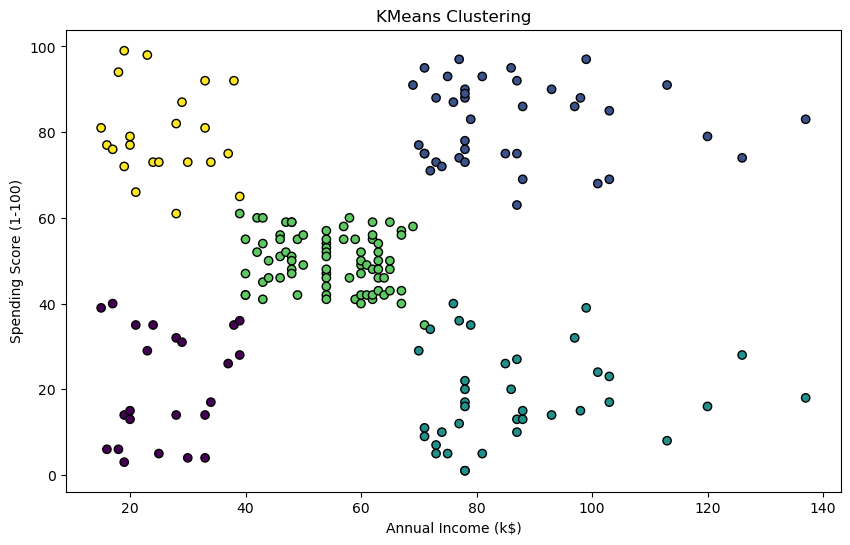

In [18]:
# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=data['KMeans_Cluster'], cmap='viridis', edgecolors='k')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


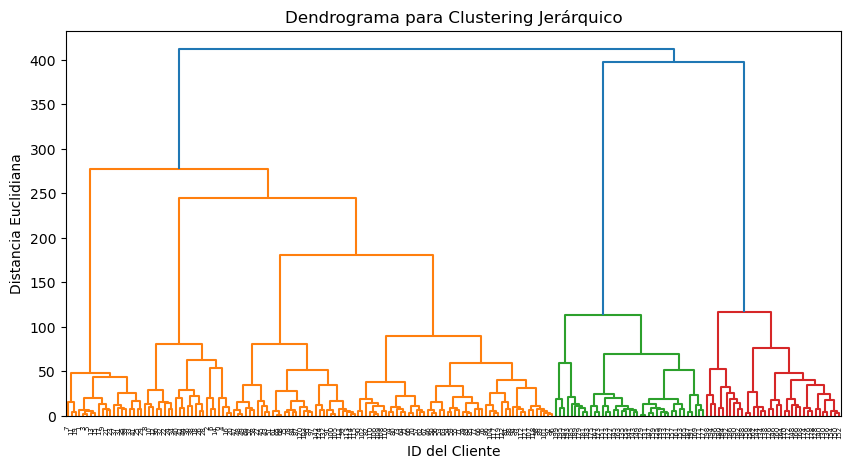

In [19]:

# Visualización del dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('ID del Cliente')
plt.ylabel('Distancia Euclidiana')
plt.show()
